In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.ascii
import pandas as pd
%matplotlib inline

# Planet: HD 189733b

### Goal: Measure planet mass based on radial velocity data

##### Cassie Moats

I first import the radial velocity data for our selected exoplanet. 

In [2]:
fname = 'UID_0098505_RVC_002.txt'

rvdat = pd.read_csv(fname,delimiter="\s+",comment='#')

rvdat.head() # units are days, m/s, m/s

,JD,Radial_Velocity,Radial_Velocity_Uncertainty
0,2.452833e+06,-13.964,1.542
1,2.452899e+06,186.717,1.480
2,2.453181e+06,153.226,1.609
3,2.453241e+06,121.542,1.139
4,2.453304e+06,-202.928,1.244


Next, I plot the radial velocity versus the time in Julian Days.

[Text(0.5, 0, 'Time (Jovian Days)'), Text(0, 0.5, 'Radial Velocity (m/s)')]

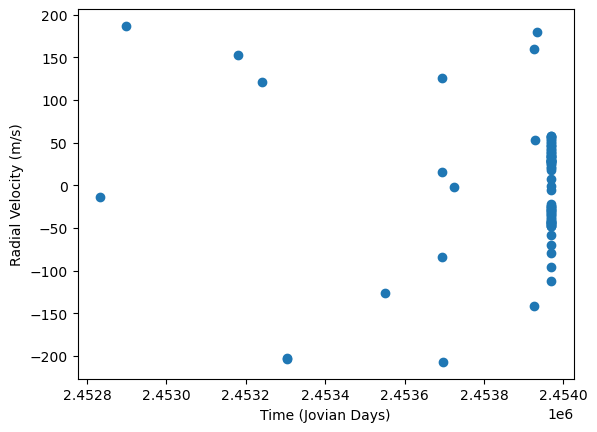

In [3]:
fig, ax = plt.subplots()
ax.scatter(rvdat["JD"], rvdat["Radial_Velocity"])

ax.set(xlabel=("Time (Jovian Days)"),
    ylabel=("Radial Velocity (m/s)"))

Next, I noted the equations of the sample code. These equations are:

$$v_r = V_Z + K(cos(\omega + f)+ e cos(\omega))$$

with $$K = {\frac {m_2}{m_1 + m_2}} {\frac{nasin(i)}{\sqrt{{(1-e^2)}}}}$$ and $$n = {\frac{2\pi}{T}}$$

where T comes from Kepler's 3rd, $${\frac{a^3}{T^2}}={\frac{G(M+m)}{4\pi^2}}$$ so the period is $$T = \sqrt{\frac{a^3*4\pi^2}{G(M+m)}}$$

f is calculated using $$2*arctan[{\frac{1+e}{1-e}}^.5*tan({\frac{E}{2}})]$$

where E is calcuated with eccentricity e not equal to 0 to be:

$$ n(t-t_0) = E-e*sin(E)$$

### Used the EXOFAST fit for the RV data in conjunction with values from the planet factsheet for the metalicity values

that link is https://exoplanetarchive.ipac.caltech.edu/overview/HD%20189733%20b#planet_HD-189733-b_collapsible

Did the EXOFAST run for Chi Squared and followed the instructions through to then do the EXOFAST MCMB.

From EXOFAST calculation, the minimum mass is given as Mp sin(i) = Minimum Mass = 1.175263 $M_J$ with errorup = +0.039145  and errordown = -0.040110 with rounding this gives Minimum mass = 1.18 ± 0.04 $M_J$.



In [41]:
MJ = 1.899e+30 # g
RJ = 7.1492e+9 # cm
def density(mass,radius):
    density = 3*(mass*MJ)/((4)*(np.pi)*((radius*RJ)**3))
    return density
density_p = density(1.18,1.2)
print(density_p)

0.8472318708227918


In [33]:
# now to propogate this error

# dq/q = ((dx/x)^2+(dy/y)^2)^(1/2)

density_err = ((0.04)**2+(0.02)**2)**(1/2)
print(density_err*1.31)

0.058584981010494495


So, HD 189733b's density is ${\rho}$ = 0.847 ± 0.06 $\frac{g}{cm^3}$ and HD 189733b's mass is 1.18 ± 0.04 $M_J$.